In [22]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [24]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [25]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
Ticker_1 = "SPY"
Ticker_2 = "AGG"
end_date = datetime.now()
start_date = end_date + timedelta(-365)
df_spy = get_historical_data(Ticker_1, start_date, end_date, output_format='pandas')
df_agg = get_historical_data(Ticker_2, start_date, end_date, output_format='pandas')
df_spy_1= df_spy.drop(columns=['open','high','low','volume'])
df_spy_2 = df_spy_1.rename(columns={"close": "SPY"})
df_agg_1=df_agg.drop(columns=['open','high','low','volume'])
df_agg_2 = df_agg_1.rename(columns={"close": "AGG"})
combined_df = pd.concat([df_spy_2, df_agg_2], axis = "columns", join = "inner")
combined_df.head()

,SPY,AGG
date,,
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33
2018-10-08,287.82,104.29


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [26]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = combined_df.pct_change()
daily_returns.head()

,SPY,AGG
date,,
2018-10-02,NaN,NaN
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200
2018-10-08,0.000000,-0.000383


In [27]:
# Calculate volatility
# YOUR CODE 
std_dev_daily_return = daily_returns.std()
std_dev_daily_return

SPY    0.010645
AGG    0.001959
dtype: float64

In [28]:
avg_daily_return = daily_returns.mean()
avg_daily_return

SPY    0.000079
AGG    0.000286
dtype: float64

In [29]:
# Save the last day's closing price
# YOUR CODE HERE
num_trading = 252
SPY_last_price = combined_df['SPY'][-1]
AGG_last_price = combined_df['AGG'][-1]
SPY_last_price

293.24

In [32]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()
simulated_price_df

""


In [37]:
# Run the Monte Carlo Simulation
   # YOUR CODE HERE
for x in range(number_simulations):
    simulated_SPY_prices = [SPY_last_price]
    simulated_AGG_prices = [AGG_last_price]
   
    for i in range(number_records):
        simulated_price_SPY = simulated_SPY_prices[-1] * (1 + np.random.normal(avg_daily_return['SPY'], std_dev_daily_return['SPY']))
        simulated_price_AGG = simulated_AGG_prices[-1] * (1 + np.random.normal(avg_daily_return['AGG'], std_dev_daily_return['AGG']))
        
        simulated_SPY_prices.append(simulated_price_SPY)
        simulated_AGG_prices.append(simulated_price_AGG)
    
    simulated_price_df["SPY prices"] = pd.Series(simulated_SPY_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_AGG_prices)
    
    combined_simulated_prices = pd.concat([simulated_price_df["SPY prices"], simulated_price_df["AGG prices"]], axis = "columns", join = "inner")

    #Calculate the daily returns of simulated prices
    simulated_daily_returns = combined_simulated_prices.pct_change()

    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the dot function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)

    # Calculate the normalized, cumulative return series
    monte_carlo[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999469,0.987349,0.999542,1.005172,0.996203,1.005697,1.006878,1.005178,0.995522,1.009361,...,1.000325,0.998834,0.997882,1.005718,1.006269,0.995991,1.004199,1.005511,1.001215,1.004106
2,1.005616,0.989797,0.998720,1.008385,1.001146,1.008515,1.011403,1.002727,0.990949,1.007280,...,1.010534,1.002299,0.995646,0.995045,1.018014,1.007830,1.003225,0.993517,0.997294,0.999111
3,1.006630,0.979904,1.001035,1.014734,1.004367,1.005980,1.023162,1.009974,0.997053,1.008779,...,1.008221,0.997243,0.996681,1.008936,1.013106,1.010891,1.000951,1.007923,0.988679,0.994747
4,1.012734,0.980953,0.994028,1.013807,1.005828,1.007171,1.021519,1.014738,0.995609,1.010992,...,1.012882,1.005622,0.996971,1.011624,1.016952,1.015783,1.002514,1.008376,0.984852,0.994697


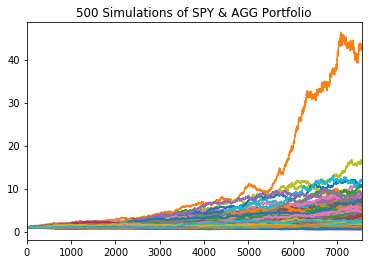

In [38]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{x+1} Simulations of SPY & AGG Portfolio"
monte_carlo.plot(legend=None, title=plot_title)

In [52]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = monte_carlo.iloc[-1:]
ending_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7560,2.04276,6.41609,1.22271,4.645346,2.182805,2.628213,2.732759,1.36143,1.104584,2.761755,...,6.774681,2.595735,5.028175,3.71264,4.16173,4.011103,4.744915,3.108031,2.4828,2.534748


In [58]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns = monte_carlo.iloc[-2520:]
ending_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
5041,1.911218,2.881544,0.747492,2.293125,1.374069,1.319834,2.129110,0.802708,1.131985,1.308675,...,3.800079,1.419612,2.777111,2.310260,2.291254,2.338352,2.454427,2.581771,1.638647,2.456868
5042,1.904208,2.883181,0.749067,2.293359,1.373184,1.328050,2.114233,0.793600,1.139122,1.298603,...,3.837339,1.412756,2.793501,2.322377,2.293523,2.359703,2.458612,2.587634,1.620517,2.466547
5043,1.901082,2.878033,0.755136,2.319883,1.382657,1.346248,2.110029,0.795940,1.138419,1.300633,...,3.862690,1.416415,2.793656,2.321594,2.266504,2.416311,2.475293,2.589780,1.642281,2.474043
5044,1.920581,2.881713,0.754263,2.334726,1.381791,1.343475,2.119955,0.793524,1.134592,1.286295,...,3.867312,1.409164,2.822162,2.318843,2.277912,2.413923,2.497571,2.586988,1.630433,2.472168
5045,1.900306,2.886278,0.754167,2.318609,1.367811,1.331820,2.105604,0.794361,1.137321,1.304863,...,3.891006,1.389973,2.846079,2.294188,2.282785,2.419164,2.522408,2.573724,1.623435,2.487200


In [41]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.1, 0.90])
confidence_interval

0.1    1.076957
0.9    3.505585
Name: 5041, dtype: float64

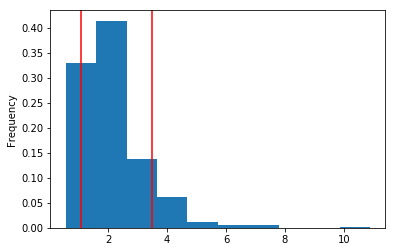

In [42]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [60]:
# YOUR CODE HERE
print(f"Expected cumulative portfolio return at 30 years for the 10th percentile is {round(np.percentile(ending_cumulative_returns,10),2)}.")
print(f"Expected cumulative portfolio return at 30 years for the 50th percentile is {round(np.percentile(ending_cumulative_returns,50),2)}.")
print(f"Expected cumulative portfolio return at 30 years for the 90th percentile is {round(np.percentile(ending_cumulative_returns,90),2)}.")

Expected cumulative portfolio return at 30 years for the 10th percentile is 1.18.
Expected cumulative portfolio return at 30 years for the 50th percentile is 2.31.
Expected cumulative portfolio return at 30 years for the 90th percentile is 4.48.


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [62]:
# YOUR CODE HERE
initial_investment = 20000
cumulative_pnl = initial_investment * ending_cumulative_returns
print(f"Expected portfolio return in dollars at the 10th percentile is ${round(np.percentile(cumulative_pnl,10),2)}.")
print(f"Expected portfolio return in dollars at the 50th percentile is ${round(np.percentile(cumulative_pnl,50),2)}.")
print(f"Expected portfolio return in dollars at the 90th percentile is ${round(np.percentile(cumulative_pnl,90),2)}.")

Expected portfolio return in dollars at the 10th percentile is $23621.99.
Expected portfolio return in dollars at the 50th percentile is $46278.87.
Expected portfolio return in dollars at the 90th percentile is $89622.84.


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [45]:
# YOUR CODE HERE
withdraw = 0.04*(round(np.percentile(ending_cumulative_returns,10),2))
projected_yearly_income = 7389
if withdraw >= projected_yearly_income:
   print("4% withdraw is sufficient to cover the projected annual income")
else:
   print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [46]:
# YOUR CODE HERE
withdraw = 0.04*(round(np.percentile(ending_cumulative_returns,10),2))
projected_yearly_income_2 = 7389 * 1.50
if withdraw >= projected_yearly_income:
  print("4% withdraw is sufficient to cover the projected annual income")
else:
  print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE